In [44]:
import pandas as pd
import numpy as np

In [2]:
df_headers=pd.read_csv('headersFile.csv', sep='\t', names=['file', 'header'])

In [3]:
df_headers.head()

,file,header
0,Ichibu Station (Nara).html.bz2,",ikoma line g19,service"
1,Mag%C3%A1n %26 Rodr%C3%ADguez.html.bz2,"album details,peak chart positions,spain,suave..."
2,Cool Woods.html.bz2,"rating,review scores,source"
3,Mag%C3%A1n %26 Rodr%C3%ADguez.html.bz2,"album details,suave ep,suave ep 2,suave ep 3,t..."
4,Mag%C3%A1n %26 Rodr%C3%ADguez.html.bz2,"chart positions,spain,title,year"


In [4]:
df_h=pd.DataFrame(df_headers.iloc[:]['header'], df_headers.index, columns=['header'])
df_h=pd.DataFrame({'count' : df_h.groupby("header").size()}).reset_index()
result = df_h.sort_values(['count'], ascending=False)
result.head(1000)

,header,count
970164,"rating,review scores,source",73944
919436,"length,no,title",63494
91070,",candidate,majority,party,swing,turnout,votes",57380
91355,",candidate,party,votes",36770
790950,"country,description,ship",30479
116168,",no,player,position",30193
950152,"notes,role,title,year",28656
38240,",1,2,3,4,total",26195
919515,"length,no,title,writer s",25654
91253,",candidate,party,total votes,votes",18130


Total Tables:

In [5]:
sum(df_h['count'])

3476745

Total distinct headers

In [6]:
df_h.count()

header    989425
count     989425
dtype: int64

Filter of tables with more than one header

In [7]:
df_h.loc[:,'correct_header']=df_h.header.apply(lambda x: len(x.split(","))>1)
df_filtered=df_h[df_h['correct_header']]
df_filtered.count()

header            954759
count             954759
correct_header    954759
dtype: int64

In [8]:
df_filtered.sort_values(['count'], ascending=False)

,header,count,correct_header
970164,"rating,review scores,source",73944,True
919436,"length,no,title",63494,True
91070,",candidate,majority,party,swing,turnout,votes",57380,True
91355,",candidate,party,votes",36770,True
790950,"country,description,ship",30479,True
116168,",no,player,position",30193,True
950152,"notes,role,title,year",28656,True
38240,",1,2,3,4,total",26195,True
919515,"length,no,title,writer s",25654,True
91253,",candidate,party,total votes,votes",18130,True


#### Distribution of number of headers. 

In [9]:
import matplotlib.pyplot as plt
from scipy import special
import matplotlib

[1.55054610e+00 3.87636524e-01 1.72282900e-01 ... 2.83605104e-10
 2.83597433e-10 2.83589762e-10]


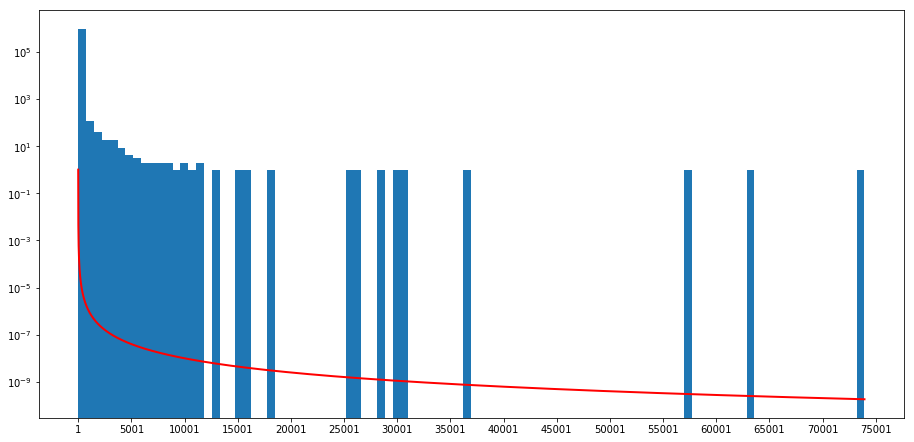

In [45]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5, 7.5)
plt.hist(df_filtered['count'], log=True,  bins=100)
a=2.
x=np.arange(1,df_filtered['count'].max())
y=x**(-a)/special.zetac(a)
print(y)
plt.plot(x,y/max(y), linewidth=2, color='r')
plt.xticks(np.arange(min(x), max(x)+5000, 5000.0))
plt.show()

Filter headers with more than 100 tables.

In [12]:
df_f1=df_filtered[df_filtered['count']>=100]

In [13]:
df_f1.sort_values(['count'], ascending=True).head(1000)

,header,count,correct_header
648566,"award,publication,review scores,score",100,True
584568,"apr,aug,average high c f,average low c f,avera...",100,True
846484,"drivers,no,rounds,team",100,True
971217,"registered voters,ward",100,True
315316,"15,5,bronze,gold,nation,rank,silver,total",100,True
752993,"city,country,date,reason,venue",100,True
609188,"athlete,ball,clubs,event,final,hoop,qualificat...",100,True
766741,"college,hometown,player,position,school",100,True
499771,"aberdeen scorer s,attendance,date,h a,match da...",100,True
842875,"div,gb,home,l,neutral,pct,road,w,western divis...",100,True


### Clustering of headers with more than 100 tables. 

The max distance (eps) for the DBscan clustering is 0,5.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
#Token_pattern changed because there is headers with one letter. 
vectorizer = CountVectorizer(list(df_f1['header']), token_pattern='(?u)\\b\\w+\\b')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=[',0 9,1,10 19,20 29,30 39,40 49,50 59,60 69,70 79,80,a,b,by sex,females,i,males,measure unit,of which in,population by age group in 2002,specification,total', ',1,10,11,12,13,14,15,2,3,4,5,6,7,8,9,eastern conference vte,gb,l,pct,team,w', ',1,10,11,12,13,14,15,2,3,4,5,6,7,8,9,gb,gp,l,pct,team,..., 'title,year', 'titles by surface,winner legend', 'winner,year', 'women s doubles,women s singles'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [15]:
dtm = vectorizer.fit_transform(df_f1['header'])
vocab = vectorizer.get_feature_names()
dtm = dtm.toarray()
vocab = np.array(vocab)

In [16]:
dtm.shape

(2059, 1961)

In [17]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.5, min_samples=2, metric="jaccard", n_jobs=4).fit(dtm)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146])

In [18]:
clusters={}
csv=""
for i, label in enumerate(labels):
    #if label!=-1:
        if clusters.get(label)==None:
            clusters[label]=1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header']+"\n"
        else:
            clusters[label]=clusters.get(label)+1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header']+"\n"

In [47]:
# Generates a cluster file. 
csv_file = open("clusters1.csv", "w")
csv_file.write(csv)
csv_file.close()

df_cluster=pd.read_csv('clusters1.csv', sep='\t', names=['cluster','header'])
df_cluster[df_cluster['cluster']!=-1].sort_values(['cluster'], ascending=True)

,cluster,header
1,0,",1,10,11,12,13,14,15,2,3,4,5,6,7,8,9,eastern c..."
1681,0,"full results,points,rank,team"
1668,0,"former team,player,signed"
1652,0,"final,rank,time"
1651,0,"final,rank"
1621,0,"event,name,rank,result"
653,0,"assists,club,player,rank"
1573,0,"drw,ga,gd,gf,lst,notes,pld,pos,pts,team,won"
1570,0,"driver,points,pos"
660,0,"athlete name,country,notes,rank,time"


DBSCAN(n_jobs=4) doesn't work. The following code gets distance matrix first using a number of jobs. 

In [20]:
from sklearn.metrics.pairwise import pairwise_distances
#res = 1-pdist(dtm, 'jaccard')
res = pairwise_distances(dtm, metric = "jaccard", n_jobs=4)
#squareform(res)
res

/home/jhomara/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.94642857, 0.94444444, ..., 0.975     , 1.        ,
        1.        ],
       [0.94642857, 0.        , 0.16666667, ..., 1.        , 1.        ,
        1.        ],
       [0.94444444, 0.16666667, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.975     , 1.        , 1.        , ..., 0.        , 0.83333333,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.83333333, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [21]:
distance = pd.DataFrame(res, index=np.arange(dtm.shape[0]), columns= np.arange(dtm.shape[0]))
np.round(distance, 2)

from numpy import isnan
where_are_NaNs = isnan(distance)
distance[where_are_NaNs] = 0.0

In [22]:
distance

,0,1,2,3,4,5,6,7,8,9,...,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058
0,0.000000,0.946429,0.944444,0.945455,0.944444,0.945455,0.942308,0.942308,0.951220,0.977778,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.975000,1.000000,1.0
1,0.946429,0.000000,0.166667,0.548387,0.533333,0.125000,0.600000,0.173913,0.846154,0.730769,...,0.961538,0.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.944444,0.166667,0.000000,0.517241,0.500000,0.208333,0.571429,0.333333,0.833333,0.708333,...,0.958333,0.956522,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
3,0.945455,0.548387,0.517241,0.000000,0.130435,0.533333,0.291667,0.633333,0.840000,0.720000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
4,0.944444,0.533333,0.500000,0.130435,0.000000,0.517241,0.260870,0.620690,0.833333,0.708333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
5,0.945455,0.125000,0.208333,0.533333,0.517241,0.000000,0.586207,0.217391,0.840000,0.720000,...,0.960000,0.958333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
6,0.942308,0.600000,0.571429,0.291667,0.260870,0.586207,0.000000,0.592593,0.818182,0.681818,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
7,0.942308,0.173913,0.333333,0.633333,0.620690,0.217391,0.592593,0.000000,0.818182,0.681818,...,0.954545,0.952381,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
8,0.951220,0.846154,0.833333,0.840000,0.833333,0.840000,0.818182,0.818182,0.000000,0.692308,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
9,0.977778,0.730769,0.708333,0.720000,0.708333,0.720000,0.681818,0.681818,0.692308,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [35]:
db = DBSCAN(eps=0.5, min_samples=2, metric="precomputed").fit(distance)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Num clusters:",len(np.unique(labels)))
clusters={}
csv=""
for i, label in enumerate(labels):
    #if label!=-1:
        if clusters.get(label)==None:
            clusters[label]=1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header']+"\n"
        else:
            clusters[label]=clusters.get(label)+1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header']+"\n"
            
csv_file = open("clusters2.csv", "w")
csv_file.write(csv)
csv_file.close()

df_cluster=pd.read_csv('clusters2.csv', sep='\t', names=['cluster','header'])


Num clusters: 148


# Using HDBSCAN clustering

In [24]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric="precomputed",  min_samples=2, min_cluster_size=2, gen_min_span_tree=True)
clusterer.fit(distance)

clusters={}
csv=""
for i, label in enumerate(clusterer.labels_):
    #if label!=-1:
        if clusters.get(label)==None:
            clusters[label]=1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header']+"\n"
        else:
            clusters[label]=clusters.get(label)+1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header']+"\n"
            
csv_file = open("clusters_hd.csv", "w")
csv_file.write(csv)
csv_file.close()

df_cluster_hd=pd.read_csv('clusters_hd.csv', sep='\t', names=['cluster','header'])
np.unique(clusterer.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

It was joined the frame that contains (DBSCAN) clusters with the main file that contains the name of file. 

In [36]:
cols = ['header']
df_merge=df_filtered.join(df_cluster.set_index(cols), on=cols)

In [37]:
df_merg1=df_headers.join(df_merge.set_index(cols), on=cols)

In [38]:
clusters_df=df_merg1[df_merg1['count']>100].sort_values(['count','header'], ascending=False).reset_index()
clusters_df.head()

,index,file,header,count,correct_header,cluster
0,2,Cool Woods.html.bz2,"rating,review scores,source",73944.0,True,56.0
1,23,Worldbeat (album).html.bz2,"rating,review scores,source",73944.0,True,56.0
2,58,Abducted (album).html.bz2,"rating,review scores,source",73944.0,True,56.0
3,94,No Stone Unturned.html.bz2,"rating,review scores,source",73944.0,True,56.0
4,96,Ghetto Fabolous.html.bz2,"rating,review scores,source",73944.0,True,56.0


### Number of tables by cluster:

In [39]:
cluster_count=clusters_df.groupby(['cluster']).size().reset_index('cluster')
cluster_count

,cluster,0
0,-1.0,141882
1,0.0,270970
2,1.0,2901
3,2.0,231069
4,3.0,211
5,4.0,3235
6,5.0,713
7,6.0,568
8,7.0,2118
9,8.0,2462


In [40]:
clusters_df

,index,file,header,count,correct_header,cluster
0,2,Cool Woods.html.bz2,"rating,review scores,source",73944.0,True,56.0
1,23,Worldbeat (album).html.bz2,"rating,review scores,source",73944.0,True,56.0
2,58,Abducted (album).html.bz2,"rating,review scores,source",73944.0,True,56.0
3,94,No Stone Unturned.html.bz2,"rating,review scores,source",73944.0,True,56.0
4,96,Ghetto Fabolous.html.bz2,"rating,review scores,source",73944.0,True,56.0
5,129,I Wish I Could Stay Here.html.bz2,"rating,review scores,source",73944.0,True,56.0
6,192,Pousette-Dart Band 3.html.bz2,"rating,review scores,source",73944.0,True,56.0
7,239,Skeleton Skeletron.html.bz2,"rating,review scores,source",73944.0,True,56.0
8,276,Spiral (Hiromi album).html.bz2,"rating,review scores,source",73944.0,True,56.0
9,389,Worlds Torn Asunder.html.bz2,"rating,review scores,source",73944.0,True,56.0


In [41]:
cluster_count.iloc[3][0]

231069.0

#### Creating a random list of tables by cluster.

In [42]:
import numpy as np
df_test=pd.DataFrame(columns=['level_0','index','file','header','count','correct_header','cluster'])
for ind in range(cluster_count.shape[0]): 
    if ind>0:
        val=int(cluster_count.iloc[ind][0])
        chosen_idx = np.random.choice(val, replace=True, size=10)
        temp=clusters_df[clusters_df['cluster']==cluster_count.iloc[ind]['cluster']].reset_index()           
        df_test=df_test.append(temp.iloc[chosen_idx])
df_test

,level_0,index,file,header,count,correct_header,cluster
225319,1140836,1875427,Swimming at the 1968 Summer Olympics %E2%80%93...,"athlete,country,note,rank,time",237.0,True,0.0
208545,1074318,1381787,1996%E2%80%9397 Tercera Divisi%C3%B3n.html.bz2,",d,ga,gf,l,pl,pos,pts,team,w",325.0,True,0.0
263276,1291243,2467805,Age groups in Scouting and Guiding.html.bz2,",10,11,12,13,14,15,16,17,18,19,20,21,5,6,7,8,9...",121.0,True,0.0
160227,899513,624935,List of birds of South Africa.html.bz2,"binomial,common name,status",849.0,True,0.0
157902,888413,1844582,Yemen at the 2012 Summer Olympics.html.bz2,"athlete,event,final,heat,quarterfinal,rank,res...",924.0,True,0.0
168207,927305,1061384,Austria at the 1956 Winter Olympics.html.bz2,"athlete,event,race 1,race 2,rank,time,total",730.0,True,0.0
10522,272589,1218117,2013%E2%80%9314 FC Dynamo Moscow season.html.bz2,",no,player,position",30193.0,True,0.0
34818,325541,629027,2013 Stanford Cardinal football team.html.bz2,",1,2,3,4,total",26195.0,True,0.0
155664,874777,848593,1990 Seattle Seahawks season.html.bz2,",1,2,3,4,ot,total",1005.0,True,0.0
171835,933774,1370134,Brazil at the 2015 Pan American Games.html.bz2,"athlete,event,final,heats,rank,semifinals,time",691.0,True,0.0


In [34]:
clusters_df[clusters_df['header']==',candidate,majority,party,swing,turnout,votes']

,index,file,header,count,correct_header,cluster
137438,247,Netherton and Orrell (ward).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137439,249,Netherton and Orrell (ward).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137440,719,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137441,722,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137442,723,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137443,725,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137444,726,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137445,727,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137446,731,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0
137447,735,Daventry (UK Parliament constituency).html.bz2,",candidate,majority,party,swing,turnout,votes",57380.0,True,1.0


In [43]:
df_test.to_csv('test_cluster1.csv', sep='\t')